<a href="https://colab.research.google.com/github/bforeman44/FDSfE_BForeman/blob/main/classdemos/10_18_2022SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
a= 0.8468
b = 45.5156486

In [1]:
print("y=ax+b")

y=ax+b


In [4]:
print("y = "+str(a)+"*x + b")

y = 0.8468*x + b


In [5]:
print("y = {0}*x + {1}".format(a,b))

y = 0.8468*x + 45.5156486


In [7]:
print("y = {0:.3f}*x + {1:.1f}".format(a,b))

y = 0.847*x + 45.5


In [9]:
print("this is {0:05d} and its also {0}".format(42))

this is 00042 and its also 42


#Gradient Descent

In [10]:
import pandas as pd

In [11]:
wbdat = pd.read_csv('https://github.com/fedhere/FDSfE_FBianco/raw/main/data/wbank_US_leb.csv')

In [12]:
wbdat

,year,leb
0,1960,69.770732
1,1961,70.270732
2,1962,70.119512
3,1963,69.917073
4,1964,70.165854
5,1965,70.214634
6,1966,70.212195
7,1967,70.560976
8,1968,69.951220
9,1969,70.507317


In [13]:
wbdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   leb     60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


Text(0, 0.5, 'life expectancy')

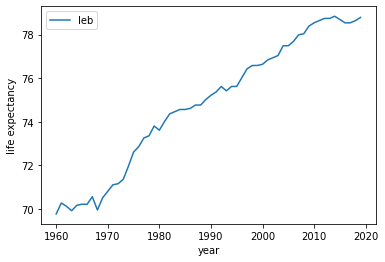

In [16]:
import pylab as plt
wbdat.plot('year','leb')
plt.ylabel("life expectancy")

#Fit a line using a gradient descent


In [17]:
def sumsqerr(Y_obs,Y_pred):
  return((Y_obs - Y_pred)**2).sum()

In [22]:
# -- extract the X and Y variables into separate arrays
X = wbdat['year'].values
Y = wbdat['leb'].values

# -- set the initial values for slope and intercept
slope = [0.1]
intercept = [-250]

# -- set the learning rate (step size)
Lrate = 1e-9

# -- set the number of iterations to perform gradient descent
epochs = 20

# -- create a list to use for saving SSE values
Y_pred = slope[-1] * X + intercept[-1]
sse = [sumsqerr(Y, Y_pred)]

# -- perform Gradient Descent
for i in range(epochs):
  # -- calculate the gradients for slope and intercept
  D_m = -2 * sum(X * (Y - Y_pred))  # Derivative wrt slope
  D_c = -2 * sum(Y - Y_pred)  # Derivative wrt intercept

  # -- calculate and update the new slope and intercept
  slope.append(slope[-1] - Lrate * D_m)
  intercept.append(intercept[-1] - Lrate * D_c)

  # -- calculate the new predicted value of Y
  Y_pred = slope[-1] * X + intercept[-1]
  
  # -- calculate and add the new SSE to list
  sse.append(sumsqerr(Y, Y_pred))

In [23]:
print("The final model for predicting life expectancy is : leb = {0:.3f}*year +{1:.1f}".format(slope[-1],intercept[-1]))

The final model for predicting life expectancy is : leb = 0.163*year +-250.0


In [24]:
import numpy as np

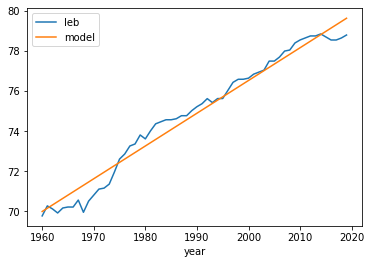

In [25]:
ax = wbdat.plot("year","leb")
x = np.arange(1960, 2020,1)
y = slope[-1]*x + intercept[-1]
ax.plot(x,y, label = "model")
ax.legend();

In [26]:
slope

[0.1,
 0.1300494933902439,
 0.14582519675815392,
 0.15410729368140766,
 0.15845531721143294,
 0.160737988954223,
 0.16193637029908148,
 0.16256550931228833,
 0.1628958014180963,
 0.1630692016887472,
 0.163160235211309,
 0.16320802696042871,
 0.16323311718236905,
 0.1632462893145723,
 0.16325320456097844,
 0.16325683500078034,
 0.16325874094779508,
 0.16325974155220332,
 0.163260266860199,
 0.1632605426420174,
 0.16326068742492328]

In [27]:
intercept

[-250,
 -249.99998489721463,
 -249.99997696844713,
 -249.999972805972,
 -249.9999706207652,
 -249.99996947360577,
 -249.99996887141157,
 -249.999968555319,
 -249.9999683894271,
 -249.99996830238916,
 -249.99996825674882,
 -249.9999682328418,
 -249.9999682203446,
 -249.99996821383746,
 -249.99996821047503,
 -249.99996820876353,
 -249.99996820791878,
 -249.99996820752904,
 -249.99996820737817,
 -249.99996820735274,
 -249.99996820739312]

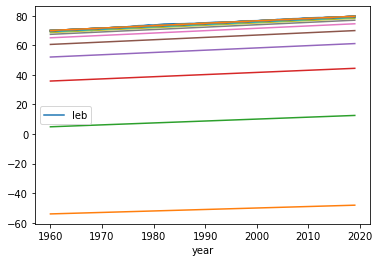

In [28]:
ax = wbdat.plot("year","leb")
x = np.arange(1960, 2020,1)
for a,b in zip(slope, intercept):
  y = a*x + b
  ax.plot(x,y)

Text(0, 0.5, 'leb')

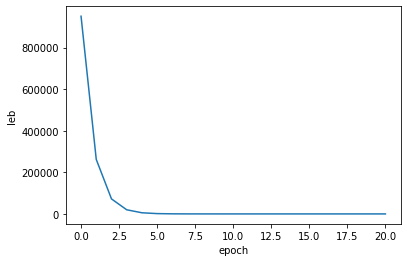

In [29]:
plt.plot(sse)
plt.xlabel("epoch")
plt.ylabel("leb")

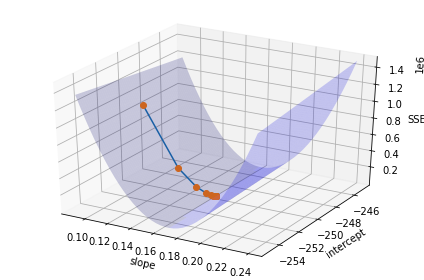

In [30]:
# -- plot the SSE surface and the gradient descent’s search for best slope and intercept
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(slope, intercept, sse)
ax.plot(slope, intercept, sse, 'o')
ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_zlabel('SSE')
def error(X, Y, THETA):
    Y_pred = THETA[1]*X + THETA[0]
    return np.sum((Y_pred - Y)**2)
ms = np.linspace(0.09, 0.24, 40)
bs = np.linspace(-255, -245, 60)
M, B = np.meshgrid(ms, bs)
zs = np.array([error(X, Y, theta)
               for theta in zip(np.ravel(B), np.ravel(M))])
Z = zs.reshape(M.shape)
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
fig.tight_layout()
plt.show()









In [31]:
import statsmodels.api as sm
model = sm.OLS(y,X)
# Show the summary
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.976e+04
Date:                Tue, 18 Oct 2022   Prob (F-statistic):                    2.28e-92
Time:                        20:46:12   Log-Likelihood:                         -131.79
No. Observations:                  60   AIC:                                      265.6
Df Residuals:                      59   BIC:                                      267.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0376      0.000    264.129      0.000       0.037       0.038
==============================================================================
Omnibus:                       15.581   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.604
Skew:                           0.000   Prob(JB):                        0.165
Kurtosis:                       1.799   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""